<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Cristian-Montelongo-A01793580/blob/main/Colaboracion_Final_y_despedida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests, zipfile
from sklearn.decomposition import TruncatedSVD
from io import BytesIO
import matplotlib.pyplot as plt

VAMOS A HACER TODO EN FUNCIONES PARA REPETIRLO EN EL 6 Y EN EL 7

In [ ]:
import requests, zipfile
from io import BytesIO

print('Downloading started')
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip'
filename = url.split('/')[-1]
req = requests.get(url)
print('Downloading Completed')
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/unzipped_zip/')
df_geo = pd.read_csv("/content/unzipped_zip/geoplaces2.csv", encoding = 'latin1')
df_rat = pd.read_csv('/content/unzipped_zip/rating_final.csv', encoding = 'latin1')

In [ ]:
print(df_geo.columns)
print(df_rat.columns)

Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')
Index(['userID', 'placeID', 'rating', 'food_rating', 'service_rating'], dtype='object')


In [ ]:
df_geo.head()
df_geo.shape

(130, 21)

In [ ]:
df_rat.head()
df_rat.shape

(1161, 5)

In [ ]:
print(df_geo.isna().sum())
print(df_rat.isna().sum())

placeID           0
latitude          0
longitude         0
the_geom_meter    0
name              0
address           0
city              0
state             0
country           0
fax               0
zip               0
alcohol           0
smoking_area      0
dress_code        0
accessibility     0
price             0
url               0
Rambience         0
franchise         0
area              0
other_services    0
dtype: int64
userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64


1.- Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios 
(user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones 
generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega 
sus primeros 10 renglones.

In [ ]:
columnas_que_necesitamos_del_1 = df_geo[['placeID',  'name']]
columnas_que_necesitamos_del_2 = df_rat[['userID', 'placeID', 'rating']]

In [ ]:
#Usamos el pd merge
#on label or list
#Column or index level names to join on. These must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.

tabla_mergeada = pd.merge(columnas_que_necesitamos_del_1 , columnas_que_necesitamos_del_2 , on='placeID')   # dataFrame

print(tabla_mergeada.head())
print(tabla_mergeada.shape)
#print(tabla_mergeada.unique())

   placeID             name userID  rating
0   134999  Kiku Cuernavaca  U1093       2
1   134999  Kiku Cuernavaca  U1066       1
2   134999  Kiku Cuernavaca  U1040       1
3   134999  Kiku Cuernavaca  U1110       2
4   134999  Kiku Cuernavaca  U1121       2
(1161, 4)


2.- Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, 
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos 
sus valores singulares. En particular indica la cantidad de valores singulares obtenidos. 

In [ ]:
#Hacemos la tabla pivote
Tabla_Pivote = tabla_mergeada.pivot_table(values='rating', index='userID', columns='name', fill_value=0)
print('Total de elementos de la matriz de utilidad: %d' % (Tabla_Pivote.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(Tabla_Pivote)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(Tabla_Pivote) / Tabla_Pivote.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 907
Porcentaje de elementos diferentes de cero: 5.1%


In [ ]:
Tabla_Pivote.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
Tabla_Pivote

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [ ]:
Tabla_Pivote.T

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
Cafe Chaires,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafeteria cenidet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos de la estacion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos los volcanes,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [ ]:
#Revisar el tema de los SVD, si dejamos 137 o 10, peo no tiene logica elasunto

#Los componentes se obtienen de la cantidad -1


Pirvote_Trans = Tabla_Pivote.T
print(Pirvote_Trans.shape) #De aqui sacamos los compoenente nos dan 138
#num_sv = 137
#La lecutra dice que  el número de componentes debe ser menor que el número de características (features/usuarios), que son 943:
#nuestro_SVD = TruncatedSVD(n_components=num_sv, random_state=1)
nuestro_SVD = TruncatedSVD(n_components=137, random_state=1)
#matriz_resultante_SVD = nuestro_SVD.fit_transform(Pirvote_Trans)
matriz_resultante_SVD = nuestro_SVD.fit(Pirvote_Trans)
matriz_resultante_SVD
num_sv = 10 #Este numero de sv, es solo para la formula de abajo
print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (nuestro_SVD.singular_values_[0:num_sv]).sum() / (nuestro_SVD.singular_values_).sum()))) #Estos no tienen sentido, un golpe mas apra los falcnistas

(129, 138)
Cantidad de información simplificada con los primeros 10 vectores singulares:
75.6%


In [ ]:
Pirvote_Trans 

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
Cafe Chaires,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafeteria cenidet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos de la estacion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos los volcanes,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [ ]:
matriz_resultante_SVD_Trans = nuestro_SVD.fit_transform(Pirvote_Trans)
matriz_resultante_SVD_Trans

array([[ 2.23152914e-01, -3.35148397e-01,  9.25716874e-01, ...,
         7.94749489e-03,  4.30362805e-16, -2.08125568e-30],
       [-1.29080727e-16,  3.86173190e-18,  9.26362385e-17, ...,
        -9.04372631e-16,  7.26378461e-17, -8.25838760e-30],
       [ 3.04948374e+00,  2.56481245e+00, -4.80893676e-01, ...,
        -2.01501322e-03, -3.99406695e-16,  1.02597958e-29],
       ...,
       [ 8.68871858e-01,  1.45545704e+00,  1.81260610e+00, ...,
         3.94017886e-03, -5.41747268e-17,  3.28314461e-30],
       [ 1.89230198e-16,  8.89426099e-17,  5.78275469e-17, ...,
        -6.45184007e-16, -3.07887308e-17, -1.56053561e-30],
       [ 2.27081553e-17, -4.31164511e-17,  8.98117762e-17, ...,
         4.05270721e-16,  6.71863644e-17, -1.13027051e-29]])

3.- Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este 
modelo no supervisado con base a la información de alguien que evaluó bien de manera general al 
“Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 
recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 

In [ ]:
#Hacemos la correlacion de pearson

#HAcemos un svd sin priovote transpuestos
nuestro_SVD_especial = TruncatedSVD(n_components=128, random_state=1)
matriz_resultante_SVD_sin_pivote = nuestro_SVD_especial.fit(Tabla_Pivote)
matriz_resultante_SVD_sin_pivote

# 1 La correlacion normal
la_matriz_de_correlacion_trans = np.corrcoef(matriz_resultante_SVD_Trans,)
print(la_matriz_de_correlacion_trans.shape)

#2 la matriz de correlacion straight
#la_matriz_de_correlacion = np.corrcoef(matriz_resultante_SVD_sin_pivote,)
#print(la_matriz_de_correlacion.shape)

(129, 129)


In [ ]:
#Definimos que nos gusta subway, aunque en realidad sabe feo, pura lechuga y carne fria

el_restaurante_favorito_del_kevin = "Subway"
nombres_de_columnas = Tabla_Pivote.columns
lista_De_nombres = list(nombres_de_columnas)
identificador_del_favorito = lista_De_nombres.index(el_restaurante_favorito_del_kevin )
identificador_del_favorito 


88

In [ ]:
#Ahora identificamos la correlacion de la columna de la que nos gusta, la que seleccionamos arriba, osea el subway
correlacion_del_mas_sabroso = la_matriz_de_correlacion_trans[identificador_del_favorito]
print(correlacion_del_mas_sabroso.shape)
print(correlacion_del_mas_sabroso)
# Veamos la correlación de este restaurant, con con todos los demas restaurantes:


(129,)
[-7.69028369e-04 -7.87822168e-05 -5.27330975e-03  8.58511349e-04
 -3.03891148e-03  3.97495832e-05 -1.54820208e-03 -5.29347145e-03
  7.27520383e-04 -1.55098452e-03 -1.84483094e-03  3.01090491e-01
 -3.06938616e-05 -3.66639157e-03 -2.28024815e-03 -1.70971180e-03
  2.66961340e-03  4.58467365e-04 -2.11449533e-03 -6.20445134e-03
  3.34268563e-03  1.16598607e-01  1.87080102e-03  2.53682556e-03
 -5.48801141e-03 -2.91288266e-03  2.02825342e-03 -1.36607265e-03
 -2.01695899e-03  1.12058244e-01 -2.36235727e-03  6.52159239e-04
  3.53495770e-03 -3.62793330e-03  1.69065407e-03 -4.51837401e-03
 -2.09301342e-03  2.34634298e-01 -3.80413494e-03 -5.11845710e-04
 -2.27148704e-03  3.88178002e-01 -2.07427108e-03 -2.29428835e-03
  1.32565455e-03  3.01002479e-01  1.71433518e-01 -3.29715354e-03
 -4.74480596e-03 -8.02527884e-04 -2.65071452e-03  1.12018889e-01
 -3.91080724e-03 -2.06369812e-03  1.16008629e-01  2.27855804e-01
  4.28342495e-04 -8.69739761e-04  6.09520875e-01 -6.43364064e-03
  4.25467169e-01 -

In [ ]:
correlacion_del_mas_sabroso[identificador_del_favorito] #Este es el valor de correlación del subay, ahora debemos de encontrar los 10 mas similares al subway

1.0

In [ ]:
lista_de_fonditas = list(nombres_de_columnas[(correlacion_del_mas_sabroso > .23) & (correlacion_del_mas_sabroso < 1.0)])
print("Estos son los 10 restaurantes mas relacionados con subway:")
len(lista_de_fonditas) #Este numero nos va  acambiar si le jugamos el numero, aqui el 23 nos da 10, jueguenle ustedes

for i in range(0, len(lista_de_fonditas)):
  print("El número", i+1, "es:", lista_de_fonditas[i])


Estos son los 10 restaurantes mas relacionados con subway:
El número 1 es: Chilis Cuernavaca
El número 2 es: Log Yin
El número 3 es: Mariscos Tia Licha
El número 4 es: Mikasa
El número 5 es: Restaurant Teely
El número 6 es: Restaurant and Bar and Clothesline Carlos N Charlies
El número 7 es: Restaurant los Pinos
El número 8 es: Rincon del Bife
El número 9 es: Sanborns Casa Piedra
El número 10 es: Vips


In [ ]:
la_correlacion_final_de_recomendaciones = []
for i in lista_de_fonditas:
  la_correlacion_final_de_recomendaciones.extend(correlacion_del_mas_sabroso[nombres_de_columnas == i]) #El extend es raro, 
la_correlacion_final_de_recomendaciones

for i in range(0, len(lista_de_fonditas)):
  print("El número", i+1, "es:", lista_de_fonditas[i], "Con un valor de correlacion de ", la_correlacion_final_de_recomendaciones[i]*100,"%")

El número 1 es: Chilis Cuernavaca Con un valor de correlacion de  30.109049104496073 %
El número 2 es: Log Yin Con un valor de correlacion de  23.463429773399934 %
El número 3 es: Mariscos Tia Licha Con un valor de correlacion de  38.817800185258264 %
El número 4 es: Mikasa Con un valor de correlacion de  30.10024785497626 %
El número 5 es: Restaurant Teely Con un valor de correlacion de  60.95208746935301 %
El número 6 es: Restaurant and Bar and Clothesline Carlos N Charlies Con un valor de correlacion de  42.54671689089263 %
El número 7 es: Restaurant los Pinos Con un valor de correlacion de  28.51492197329663 %
El número 8 es: Rincon del Bife Con un valor de correlacion de  42.98238308559093 %
El número 9 es: Sanborns Casa Piedra Con un valor de correlacion de  41.72185013479371 %
El número 10 es: Vips Con un valor de correlacion de  50.62776799761154 %


In [ ]:
len(Pirvote_Trans.columns)-80

58

4.  Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las 
recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 
recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares 
encontrado y la cantidad de información que contienen. 

In [ ]:
Pirvote_Trans_para_4 = Tabla_Pivote.T
print(Pirvote_Trans_para_4.shape)
nuestro_SVD_para_4 = TruncatedSVD(n_components=8, random_state=1) #Aqui los componentes le ponemos el 58 que pusimos
matriz_resultante_SVD_para_4 = nuestro_SVD_para_4.fit(Pirvote_Trans_para_4)
matriz_resultante_SVD_para_4

matriz_resultante_SVD_para_4_Trans = nuestro_SVD_para_4.fit_transform(Pirvote_Trans_para_4)
matriz_resultante_SVD_para_4_Trans

la_matriz_de_correlacion_trans_para_4 = np.corrcoef(matriz_resultante_SVD_para_4_Trans,)
print(la_matriz_de_correlacion_trans_para_4.shape)

el_restaurante_favorito_del_kevin = "Subway"
nombres_de_columnas = Tabla_Pivote.columns
lista_De_nombres = list(nombres_de_columnas)
identificador_del_favorito = lista_De_nombres.index(el_restaurante_favorito_del_kevin )
identificador_del_favorito 

correlacion_del_mas_sabroso_para_4 = la_matriz_de_correlacion_trans_para_4 [identificador_del_favorito]
print(correlacion_del_mas_sabroso_para_4.shape)
print(correlacion_del_mas_sabroso_para_4)

correlacion_del_mas_sabroso[identificador_del_favorito]

lista_de_fonditas_para_4 = list(nombres_de_columnas[(correlacion_del_mas_sabroso_para_4 > .23) & (correlacion_del_mas_sabroso_para_4 < .99)]) #Aqui jueguenle para que les salga el 10 hasta aqui nos sale 11
print("Estos son los 10 restaurantes mas relacionados con subway:")
len(lista_de_fonditas_para_4 ) #Este numero nos va  acambiar si le jugamos el numero, aqui el 23 nos da 10, jueguenle ustedes

for i in range(0, len(lista_de_fonditas_para_4 )):
  print("El número", i+1, "es:", lista_de_fonditas_para_4 [i])

la_correlacion_final_de_recomendaciones_para_4 = []

for i in lista_de_fonditas_para_4 :
  la_correlacion_final_de_recomendaciones_para_4.extend(correlacion_del_mas_sabroso_para_4 [nombres_de_columnas == i]) #El extend es raro, 
la_correlacion_final_de_recomendaciones_para_4

for i in range(0, len(lista_de_fonditas_para_4 )):
  print("El número", i+1, "es:", lista_de_fonditas_para_4 [i], "Con un valor de correlacion de ", la_correlacion_final_de_recomendaciones_para_4[i]*100,"%")

(129, 138)
(129, 129)
(129,)
[-0.16927767  0.99973581 -0.37072809 -0.13221451  0.9998628  -0.09094025
 -0.02683001 -0.05738988 -0.02917894 -0.13074255 -0.24041686  0.99992142
 -0.1368604  -0.11740165 -0.09031649 -0.03326814  0.99987297 -0.08885463
  0.03855004 -0.28870427  0.99989542  0.99987556 -0.09844252 -0.11632059
 -0.04478147 -0.0265806  -0.14728658  0.0038531  -0.13449917  0.99984822
 -0.1990736   0.09123885 -0.04919435 -0.19981207 -0.0027922  -0.31181798
 -0.03358955  0.99999388  0.99994798  0.0277166  -0.20539118  0.99996967
  0.99988979 -0.09216898 -0.06966319  0.99995838  0.99998768 -0.18775306
 -0.03800029 -0.0976523  -0.23704062  0.99989437 -0.09468662  0.01293432
  0.99985664  0.99991943 -0.20806004  0.03955841  0.99999228 -0.36081515
  0.99998129 -0.09279773 -0.08343556 -0.06602446  0.99998366 -0.14673513
 -0.10080718  0.04534648 -0.15721479 -0.27928814 -0.47422372 -0.00513966
 -0.26605605 -0.13930814  0.05759995 -0.1346571  -0.18594523  0.08141895
 -0.04183823 -0.210814

- El número 1 es: Chilis Cuernavaca Con un valor de correlacion de  30.109049104496073 %
- El número 2 es: Log Yin Con un valor de correlacion de  23.463429773399934 %
- El número 3 es: Mariscos Tia Licha Con un valor de correlacion de  38.817800185258264 %
- El número 4 es: Mikasa Con un valor de correlacion de  30.10024785497626 %
- El número 5 es: Restaurant Teely Con un valor de correlacion de  60.95208746935301 %
- El número 6 es: Restaurant and Bar and Clothesline Carlos N Charlies Con un valor de correlacion de  42.54671689089263 %
- El número 7 es: Restaurant los Pinos Con un valor de correlacion de  28.51492197329663 %
- El número 8 es: Rincon del Bife Con un valor de correlacion de  42.98238308559093 %
- El número 9 es: Sanborns Casa Piedra Con un valor de correlacion de  41.72185013479371 %
- El número 10 es: Vips Con un valor de correlacion de  50.62776799761154 %

In [ ]:
porcen=nuestro_SVD_para_4.explained_variance_ratio_.sum() #Aqui dice que 58 componentes son el 98 de nuestra representaicon de valores
longitud=nuestro_SVD_para_4.explained_variance_ratio_
print(porcen)

0.3825863969562518


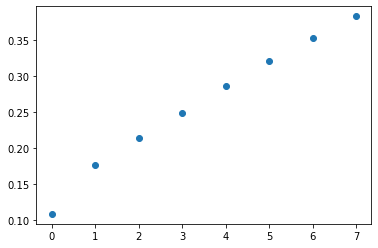

In [ ]:
plt.scatter(range(len(longitud)), np.cumsum(longitud))

5.  Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones. 

In [ ]:
el_restaurante_favorito_del_kevin = "tacos de barbacoa enfrente del Tec"

 
6.  Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada a la comida (food_rating). Incluye tus conclusiones. 

In [ ]:
Tabla_Pivote = tabla_mergeada.pivot_table(values='food_rating', index='userID', columns='name', fill_value=0)

7.  Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada al servicio (service_rating). Incluye tus conclusiones. 

In [ ]:
Tabla_Pivote = tabla_mergeada.pivot_table(values='(service_rating', index='userID', columns='name', fill_value=0)

8.  Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos. 